In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib

weighted_cut_lens = [7, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100, 120]
cut_lens = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 110, 120]
shift_lens = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 19, 24, 29, 34, 44, 54, 64, 74, 84, 94, 104, 114]
cut_lens_test = [120]

catmag_bins = np.arange(7,92,1)/10

len(cut_lens)

26

7
10
15
20
25
30
40
50
60
80
100
120


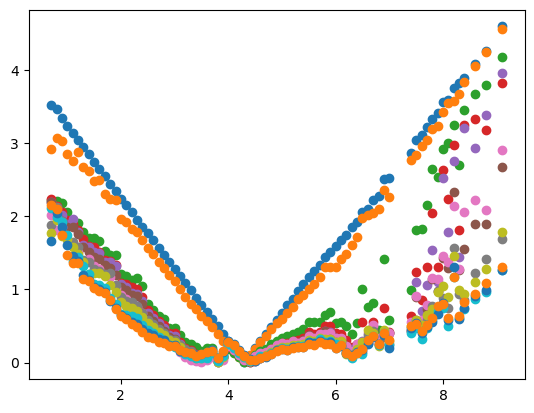

In [10]:
empty_for_will = np.zeros((len(weighted_cut_lens),85,2))
# print(empty_for_will)

for idx2 in range(len(weighted_cut_lens)):
#     print('---------------------------------')
#     print('Cut len: ' + str(cut_len))
#     print('Shift len: ' + str(cut_len-6))

    cut_len = weighted_cut_lens[idx2]
#     print(idx2)
    print(cut_len)
    
    stats_save_dir = '/home/sdybing/mlaapde/testdata_preds/weighted_training/boxplot_stats/' + str(cut_len-6) + 's_window/'
    
    Q1s = np.load(stats_save_dir + str(cut_len-6) + 's_window_Q1s.npy')
    Q3s = np.load(stats_save_dir + str(cut_len-6) + 's_window_Q3s.npy')
    IQRs = np.load(stats_save_dir + str(cut_len-6) + 's_window_IQRs.npy')
    medians = np.load(stats_save_dir + str(cut_len-6) + 's_window_medians.npy')
    means = np.load(stats_save_dir + str(cut_len-6) + 's_window_means.npy')
    stds = np.load(stats_save_dir + str(cut_len-6) + 's_window_stds.npy')
    
#     print(len(medians))
#     print(medians)
    
    for idx in range(len(medians)):
        if medians[idx] == 'nan':
            medians[idx] == np.nan
    
    medians_float = medians.astype('float')
    
#     plt.scatter(catmag_bins, medians_float)
#     plt.xlim(0.5, 9.2)
#     plt.ylim(0.5, 9.2)
#     plt.show();
    
    predmed_diff_from_catmag = []
    
    for idx in range(len(medians_float)):
        
        # print(idx)
        predmed = medians_float[idx]
        # print(predmed)
        catmag = catmag_bins[idx]
        # print(catmag)
        
        if medians_float[idx] != np.nan:
            diff = predmed - catmag
            # print(diff)
            
        else:
            diff = np.nan
            
        predmed_diff_from_catmag.append(diff)
        
#     print(len(predmed_diff_from_catmag))
    
    abs_error = np.abs(predmed_diff_from_catmag)
    
#     plt.scatter(catmag_bins, predmed_diff_from_catmag)
    plt.scatter(catmag_bins, abs_error)
    
    empty_for_will[idx2, :, 0] = catmag_bins # catalog mags
    empty_for_will[idx2, :, 1] = abs_error # abs(error)
    
# print(empty_for_will)

In [11]:
array = empty_for_will
array.shape

(12, 85, 2)

In [12]:
array[0,:,:]

array([[7.0000000e-01, 3.5247680e+00],
       [8.0000000e-01, 3.4690760e+00],
       [9.0000000e-01, 3.3455860e+00],
       [1.0000000e+00, 3.2402410e+00],
       [1.1000000e+00, 3.1440786e+00],
       [1.2000000e+00, 3.0463036e+00],
       [1.3000000e+00, 2.9560780e+00],
       [1.4000000e+00, 2.8471256e+00],
       [1.5000000e+00, 2.7414923e+00],
       [1.6000000e+00, 2.6454457e+00],
       [1.7000000e+00, 2.5571917e+00],
       [1.8000000e+00, 2.4441020e+00],
       [1.9000000e+00, 2.3471466e+00],
       [2.0000000e+00, 2.2432218e+00],
       [2.1000000e+00, 2.1532682e+00],
       [2.2000000e+00, 2.0571893e+00],
       [2.3000000e+00, 1.9527180e+00],
       [2.4000000e+00, 1.8582510e+00],
       [2.5000000e+00, 1.7719900e+00],
       [2.6000000e+00, 1.6746730e+00],
       [2.7000000e+00, 1.5731476e+00],
       [2.8000000e+00, 1.4769146e+00],
       [2.9000000e+00, 1.3817190e+00],
       [3.0000000e+00, 1.2814620e+00],
       [3.1000000e+00, 1.1843723e+00],
       [3.2000000e+00, 1.

In [13]:
array[0,:,0]

array([0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
       2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2,
       3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5,
       4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8,
       5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1,
       7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4,
       8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1])

In [14]:
array[0,:,1]

array([3.5247680e+00, 3.4690760e+00, 3.3455860e+00, 3.2402410e+00,
       3.1440786e+00, 3.0463036e+00, 2.9560780e+00, 2.8471256e+00,
       2.7414923e+00, 2.6454457e+00, 2.5571917e+00, 2.4441020e+00,
       2.3471466e+00, 2.2432218e+00, 2.1532682e+00, 2.0571893e+00,
       1.9527180e+00, 1.8582510e+00, 1.7719900e+00, 1.6746730e+00,
       1.5731476e+00, 1.4769146e+00, 1.3817190e+00, 1.2814620e+00,
       1.1843723e+00, 1.0868340e+00, 9.8596930e-01, 8.8252900e-01,
       7.9102100e-01, 6.9164000e-01, 5.9422570e-01, 4.9859070e-01,
       3.9203130e-01, 3.0100900e-01, 2.0176540e-01, 1.0355830e-01,
       4.1020000e-03, 9.3992600e-02, 1.9490100e-01, 2.9383140e-01,
       3.9614120e-01, 4.8900500e-01, 5.8833640e-01, 6.8152240e-01,
       7.8065640e-01, 8.7166230e-01, 9.8298800e-01, 1.0681740e+00,
       1.1679410e+00, 1.2502590e+00, 1.3410730e+00, 1.4453304e+00,
       1.5123314e+00, 1.5912185e+00, 1.6755310e+00, 1.7491580e+00,
       1.8535490e+00, 1.9234090e+00, 2.0661917e+00, 2.0979253e

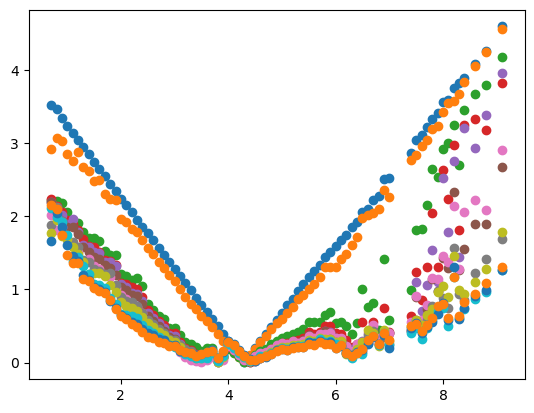

In [16]:
for idx3 in range(len(weighted_cut_lens)):
    plt.scatter(array[idx3,:,0], array[idx3,:,1])

In [17]:
np.save('/home/sdybing/mlaapde/testdata_preds/weighted_training/catmag_abserror_window_forwill.npy', array)

In [18]:
tryarray = np.load('/home/sdybing/mlaapde/testdata_preds/weighted_training/catmag_abserror_window_forwill.npy')
tryarray.shape

(12, 85, 2)

In [19]:
print(array[0])

[[7.0000000e-01 3.5247680e+00]
 [8.0000000e-01 3.4690760e+00]
 [9.0000000e-01 3.3455860e+00]
 [1.0000000e+00 3.2402410e+00]
 [1.1000000e+00 3.1440786e+00]
 [1.2000000e+00 3.0463036e+00]
 [1.3000000e+00 2.9560780e+00]
 [1.4000000e+00 2.8471256e+00]
 [1.5000000e+00 2.7414923e+00]
 [1.6000000e+00 2.6454457e+00]
 [1.7000000e+00 2.5571917e+00]
 [1.8000000e+00 2.4441020e+00]
 [1.9000000e+00 2.3471466e+00]
 [2.0000000e+00 2.2432218e+00]
 [2.1000000e+00 2.1532682e+00]
 [2.2000000e+00 2.0571893e+00]
 [2.3000000e+00 1.9527180e+00]
 [2.4000000e+00 1.8582510e+00]
 [2.5000000e+00 1.7719900e+00]
 [2.6000000e+00 1.6746730e+00]
 [2.7000000e+00 1.5731476e+00]
 [2.8000000e+00 1.4769146e+00]
 [2.9000000e+00 1.3817190e+00]
 [3.0000000e+00 1.2814620e+00]
 [3.1000000e+00 1.1843723e+00]
 [3.2000000e+00 1.0868340e+00]
 [3.3000000e+00 9.8596930e-01]
 [3.4000000e+00 8.8252900e-01]
 [3.5000000e+00 7.9102100e-01]
 [3.6000000e+00 6.9164000e-01]
 [3.7000000e+00 5.9422570e-01]
 [3.8000000e+00 4.9859070e-01]
 [3.9000